<a href="https://colab.research.google.com/github/bcsanup-github/AI-ML-DL_Projects/blob/main/Housepriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
pip install pandas scikit-learn matplotlib seaborn

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [16]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print("Dataset Loaded")
print(df.head())

Dataset Loaded
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [17]:
print("\nDataset Info")
print(df.info())

print("\nDataset Describe")
print(df.describe())


Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None

Dataset Describe
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.1

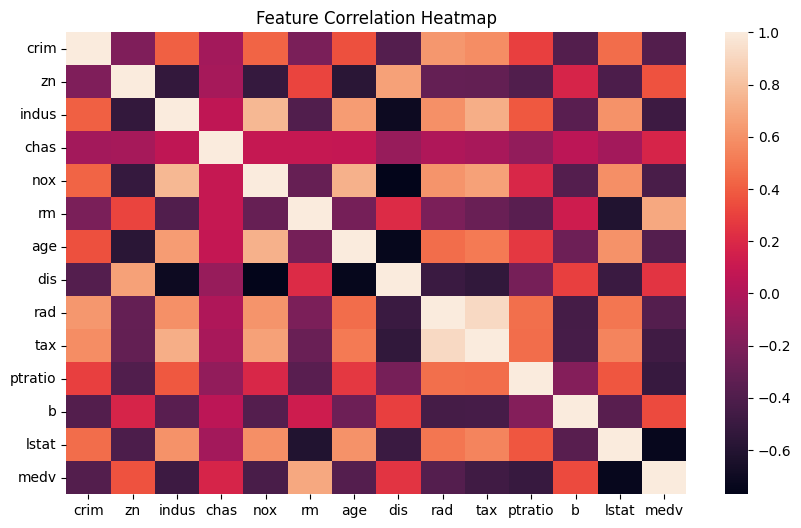

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [19]:
X = df.drop("medv", axis=1)
y = df["medv"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [21]:
pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("R2 Score:", r2_score(y_test, pred))

MAE: 3.1890919658878323
R2 Score: 0.6687594935356338


In [22]:
def predict_from_dataset(index):
    house = X.iloc[index:index+1]
    actual = y.iloc[index]
    predicted = model.predict(house)[0]

    print("\nHouse Index:", index)
    print("Actual Price:", actual)
    print("Predicted Price:", predicted)

predict_from_dataset(10)
predict_from_dataset(50)
predict_from_dataset(100)


House Index: 10
Actual Price: 15.0
Predicted Price: 18.95878456712292

House Index: 50
Actual Price: 19.7
Predicted Price: 20.98738625224113

House Index: 100
Actual Price: 27.5
Predicted Price: 25.14113573115722
